In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\DeepLearning-TensorFlow'))
	print(os.getcwd())
except:
	pass


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Y = 5x + 2 + N(0, ϵ)
N = 100
w_actual = 5
b_actual = 2
epsilon = .1            #Noise Scale

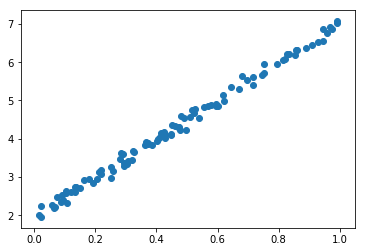

Shape X: (100, 1), Y: (100,)


In [4]:
X = np.random.rand(N, 1)
noise = np.random.normal(scale=epsilon, size=(N, 1))    #1D
Y = np.reshape(w_actual * X + b_actual + noise, (-1,))
plt.scatter(X, Y)
plt.show()
#plt.savefig("lr_data.png")
print("Shape X: {}, Y: {}".format(X.shape, Y.shape))

In [5]:
'''Training models with TensorFlow
Suppose we have specified placeholders for datapoints and labels, and have
defined a loss with tensorial operations with added an optimizer node to 
computational graph, will perform gradient descent steps.

Now can we iteratively perform gradient descent to learn on this dataset?
yes:    using Python for-loop. In each iteration, sess.run() to fetch the 
train optimizer along with the merged summary and the loss from the graph. 
We feed all datapoints and labels into sess.run() using a feed dictionary
'''
#Putting All Together, Generate tensorflow graph
tf.reset_default_graph()                  #Reset all previous tf sessions
with tf.name_scope("placeholders"):
  x = tf.placeholder(tf.float32, (N, 1))
  y = tf.placeholder(tf.float32, (N,))

with tf.name_scope("weights"):
  W = tf.Variable(tf.random_normal((1, 1)))
  b = tf.Variable(tf.random_normal((1,)))

with tf.name_scope("prediction"):
  y_pred = tf.matmul(x, W) + b

with tf.name_scope("loss"):
  l = tf.reduce_sum((y_pred - y)**2)

lr = 0.001
with tf.name_scope('optimizer'):
    train_op = tf.train.AdamOptimizer(lr).minimize(l)

with tf.name_scope("summaries"):
  tf.summary.scalar("loss", l)
  merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('/tf_logdir/lr-train/', tf.get_default_graph())

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
'''Training the linear regression model
'''
epoc = 10000
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  #Model Training
  for i in range(epoc):
    _, summary, loss = sess.run([train_op, merged, l], feed_dict={
          x: X,
          y: Y
      })
    print("Step: %d, loss: %f" %(i, loss))
    train_writer.add_summary(summary, i)
  #EOFor
  w_final, b_final = sess.run([W, b])

  Y_pred = sess.run(y_pred, feed_dict={x: X})

Step: 0, loss: 320653.093750
Step: 1, loss: 320494.375000
Step: 2, loss: 320335.656250
Step: 3, loss: 320177.062500
Step: 4, loss: 320018.562500
Step: 5, loss: 319860.000000
Step: 6, loss: 319701.562500
Step: 7, loss: 319543.156250
Step: 8, loss: 319384.750000
Step: 9, loss: 319226.375000
Step: 10, loss: 319068.125000
Step: 11, loss: 318909.875000
Step: 12, loss: 318751.718750
Step: 13, loss: 318593.625000
Step: 14, loss: 318435.593750
Step: 15, loss: 318277.625000
Step: 16, loss: 318119.593750
Step: 17, loss: 317961.687500
Step: 18, loss: 317803.875000
Step: 19, loss: 317646.062500
Step: 20, loss: 317488.375000
Step: 21, loss: 317330.750000
Step: 22, loss: 317173.062500
Step: 23, loss: 317015.500000
Step: 24, loss: 316858.125000
Step: 25, loss: 316700.625000
Step: 26, loss: 316543.250000
Step: 27, loss: 316385.968750
Step: 28, loss: 316228.718750
Step: 29, loss: 316071.500000
Step: 30, loss: 315914.375000
Step: 31, loss: 315757.281250
Step: 32, loss: 315600.312500
Step: 33, loss: 3154

In [7]:
'''Visualizing linear regression models with TensorBoard'''
#In Command Prompt
#!tensorboard --logdir=/tf_logdir/lr-train

'Visualizing linear regression models with TensorBoard'

In [8]:
'''Matrics'''
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
Y_pred = np.reshape(Y_pred, -1)
r2 = pearsonr(Y, Y_pred)[0]**2
rms = np.sqrt(mean_squared_error(Y, Y_pred))
print('Pearson R2: %f, RMS: %f' %(r2, rms))

Pearson R2: 0.994058, RMS: 1.126121


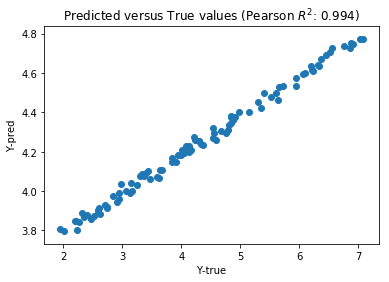

In [9]:
#Plotting the Pearson correlation coefficient
plt.clf()         
plt.xlabel("Y-true")
plt.ylabel("Y-pred")
plt.title("Predicted versus True values (Pearson $R^2$: %.3f)" %r2)
plt.scatter(Y, Y_pred)
#plt.savefig("lr_pred.png")
plt.show()

In this figure, predicted and true values are highly correlated with an R2 of nearly 1.
It looks like learning has done a wonderful job on this system and succeeded in learning the true rule.
Note that the scale on the two axes in the figure isn’t the same! It turns out that R2 doesn’t penalize 
for differences in scale. In order to understand what’s happened on this system, we need to consider 
an alternate metric RMS, below

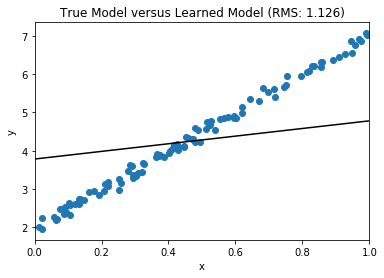

In [10]:
#Now draw with learned regression line
#Plotting the root-mean-squared error (RMSE)
plt.clf()
plt.xlabel("x")
plt.ylabel("y")
plt.title("True Model versus Learned Model (RMS: %.3f)" %rms)
plt.xlim(0, 1)
plt.scatter(X, Y)
x_left = 0
y_left = w_final[0]*x_left + b_final
x_right = 1
y_right = w_final[0]*x_right + b_final
plt.plot([x_left, x_right], [y_left, y_right], color='k')
#plt.savefig("lr_learned.png")
plt.show()

The RMSE is a measure of the average difference between predicted values and true values
In above figure plotted predicted values and true labels as two separate functions using datapoints x 
as on x-axis.  Note that the line learned isn’t the true function!
The RMSE is relatively high and diagnoses the error, unlike the R2, which didn’t pick up on this error

What happened on this system? Why didn’t TensorFlow learn the correct function despite being trained 
to convergence? This example provides a good illustration of one of the weaknesses of gradient descent 
algorithms. There is no guarantee of finding the true solution! The gradient descent algorithm can 
get trapped in local minima. That is, it can find solutions that look good, but are not in fact the 
lowest minima of the loss function ℒ .

Why use gradient descent at all then? For simple systems, it is indeed often better to avoid gradient 
descent and use other algorithms that have stronger performance guarantees. However, on complicated 
systems, there do not yet exist alternative algorithms that perform better than gradient descent. 